In [15]:
import matplotlib.pyplot as plt
import numpy as np

from DataModel import DataModel

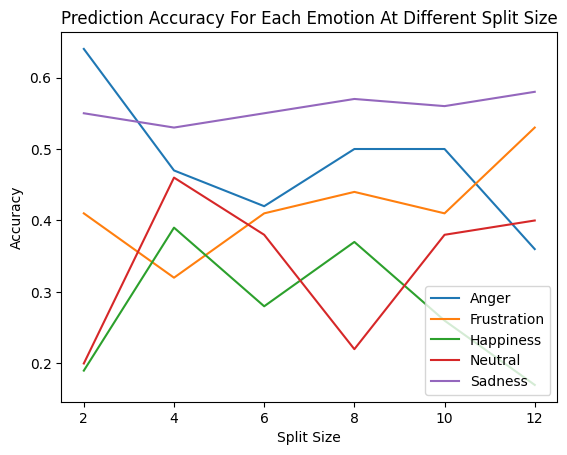

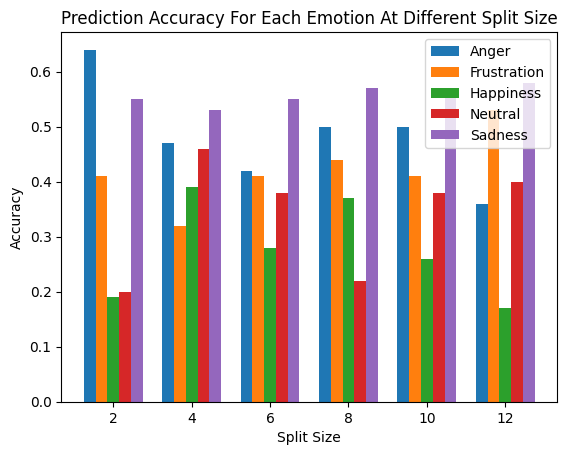

In [13]:
anger = [0.64, 0.47, 0.42, 0.5, 0.5, 0.36]
frustration = [0.41, 0.32, 0.41, 0.44, 0.41, 0.53]
happiness = [0.19, 0.39, 0.28, 0.37, 0.26, 0.17]
neutral = [0.2, 0.46, 0.38, 0.22, 0.38, 0.4]
sadness = [0.55, 0.53, 0.55, 0.57, 0.56, 0.58]
x = [2, 4, 6, 8, 10, 12]
x_axis = np.arange(len(x))

plt.plot(x, anger, label='Anger')
plt.plot(x, frustration, label='Frustration')
plt.plot(x, happiness, label='Happiness')
plt.plot(x, neutral, label='Neutral')
plt.plot(x, sadness, label='Sadness')
plt.title('Prediction Accuracy For Each Emotion At Different Split Size')
plt.xlabel('Split Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.bar(x_axis - 0.3, anger, 0.15, label="Anger")
plt.bar(x_axis - 0.15, frustration, 0.15, label="Frustration")
plt.bar(x_axis, happiness, 0.15, label='Happiness')
plt.bar(x_axis + 0.15, neutral, 0.15, label='Neutral')
plt.bar(x_axis + 0.3, sadness, 0.15, label='Sadness')
plt.xticks(x_axis, x)
plt.title('Prediction Accuracy For Each Emotion At Different Split Size')
plt.xlabel('Split Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
labelsToInclude = ['Anger', 'Frustration', 'Happiness', 'Neutral',  'Sadness']
mergeHappinessExcitement = True
splitDuration = 8
ignoreDuration = 2
transformByStft=True
hop_length = 512
win_length = 2048
n_mels = 128
onehot = False

dataModel = DataModel(labelsToInclude=labelsToInclude,
                                                mergeHappinessExcitement=mergeHappinessExcitement,
                                                splitDuration=splitDuration,
                                                ignoreDuration=ignoreDuration,
                                                transformByStft=transformByStft,
                                                hop_length=hop_length,
                                                win_length=win_length,
                                                n_mels=n_mels,
                                                onehot=onehot)
dataModel.extractEmoDBData()
dataModel.processData()

Loading and Extracting EmoDB Data...
    Loaded and Extracted   408 data

Data Extration Completed
    Number of data: 408
      Neutral     : 79
      Frustration : 69
      Anger       : 127
      Sadness     : 62
      Happiness   : 71
      Excitement  : 0
      Surprise    : 0
      Disgust     : 0
      Fear        : 0
      Boredom     : 0

Splitting data...
Train Test Split Completed
    Training Size : 327
    Testing Size  : 81

Split or Add Padding for training data:
    Split Duration  : 8
    Ignore Duration : 2
Processing...
    Processed   327 data split and padding
Data Splitting and Padding For Training Completed!

Processing training data to Mel Spectrogram...
    Processed   327 Mel Spectrogram
Mel Spectrogram Processing For Training Completed
    Shape of training images: (327, 128, 251, 1)

Processing training labels...
Label Processing For Training Completed

Split or Add Padding for testing data
    Split Duration  : 8
    Ignore Duration : 2
Processing...
    Pr

In [29]:
dataModel.data[0].shape

(128, 251, 1)

In [30]:
dataModel.x_train[0].shape

(128, 251, 1)